# Linear Regression from Scratch in PyTorch


Linear Regression is a foundational tool in the field of machine learning and statistics, used for predicting a continuous target variable based on one or more predictor variables. This guide delves into implementing linear regression in PyTorch, a leading deep learning library.

## Theoretical Background

Linear regression models the relationship between a dependent variable, `y`, and one or more independent variables, `X`, as a linear function:

$ y = Xw + b + \epsilon $

- $X$ represents the independent variables (features).
- $w$ is a weight matrix corresponding to the coefficients of the features.
- $b$ is the bias term, an intercept in the linear equation.
- $\epsilon$ is the error term, capturing the deviation of the predictions from the actual values.

The goal of linear regression is to find the optimal $w$ and $b$ that minimize the difference between predicted and actual values, typically using the Mean Squared Error (MSE) loss function:

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

Here, $y_i$ is the actual value, and $\hat{y}_i$ is the predicted value for the ith instance.

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from src.data import DataLoaderScratch
from src.trainer import TrainerScratch
from src.optimizers import SGDScratch

## Data Preparation

### Synthetic Data Generation

We generate synthetic data to mimic a real-world linear relationship, adding Gaussian noise to simulate real-world data imperfections. This data serves as a playground to test our regression models.

In [2]:
n = 1000
w = torch.tensor([2, -3.4]).reshape((-1, 1))
b = 4

X = torch.randn(n, len(w))
noise = torch.normal(mean=0, std=0.01, size=(n, 1))
y = X @ w + b + noise

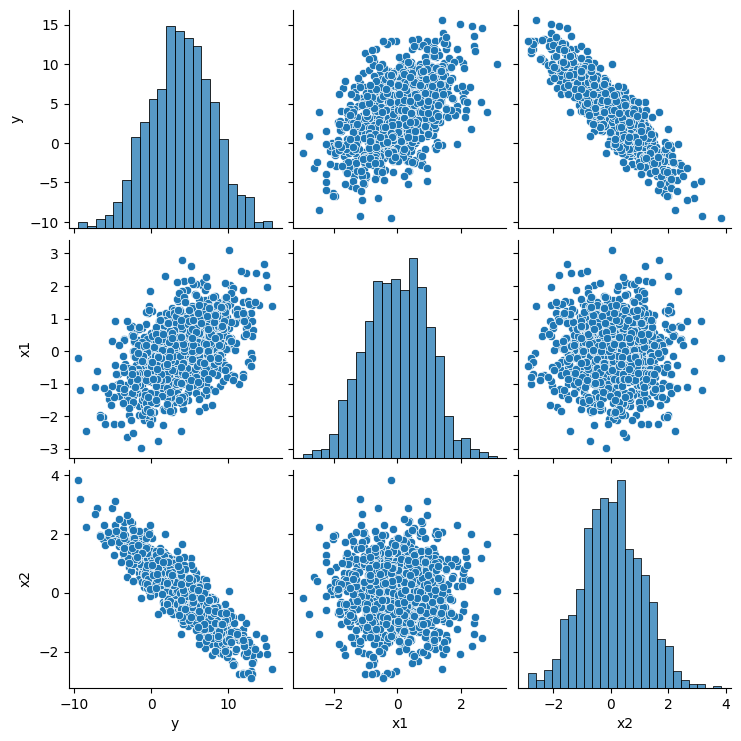

In [3]:
df = pd.DataFrame(torch.cat([y.reshape(-1, 1), X], dim=1), columns=["y", "x1", "x2"])
sns.pairplot(df)

### Data Splitting

The data is split into training and validation sets. The training set is used to train the model, and the validation set is used to evaluate its performance. This split helps in detecting overfitting and underfitting.

In [4]:
def train_test_split(X, y, train_size=0.8):
    # Shuffle the indices
    indices = torch.randperm(len(X)).tolist()

    # Calculate the number of samples in the training set
    train_size = int(train_size * len(X))

    # Slice the tensors to create training and validation sets
    X_train, y_train = X[indices[:train_size]], y[indices[:train_size]]
    X_val, y_val = X[indices[train_size:]], y[indices[train_size:]]

    return X_train, y_train, X_val, y_val

In [5]:
X_train, y_train, X_val, y_val = train_test_split(X, y, train_size=0.8)
train_dataloader = DataLoaderScratch(X_train, y_train, batch_size=64, shuffle=True)
val_dataloader = DataLoaderScratch(X_val, y_val, batch_size=64, shuffle=False)

## Linear Regression from Scratch

### Single Batch Iteration

In [6]:
in_features = X_train.shape[1]
num_samples = X_train.shape[0]
batch_size = 512

# Initialize weights
w = torch.randn(in_features, 1, requires_grad=True)
b = torch.zeros(1, 1, requires_grad=True)

parameters = [w, b]
optimizer = SGDScratch(parameters, lr=0.1)

# Create a batch
X_batch = X_train[: batch_size]
y_batch = y_train[: batch_size]

In [7]:
num_epochs = 3
for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_dataloader:
        inputs, targets = batch
    
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass (training)
        y_pred = X_batch @ w + b
        
        # Calculate Loss
        def mse_loss(y_pred, y): 
            loss = torch.mean((y - y_pred) ** 2)
            return loss
        
        loss = mse_loss(y_pred, y_batch)
        # Backward pass (compute gradients)
        loss.backward()
        
        # Update parameters
        optimizer.step()
        total_loss += loss.item()

    print(total_loss / len(train_dataloader))

5.454011788735023
0.018413693720224097
0.0001741842620853836


### Define Training Loop and Model

In [8]:
class LinearRegressionScratch(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.w = torch.randn(in_features, 1, requires_grad=True)
        self.b = torch.zeros(1, 1, requires_grad=True)

    def forward(self, X):
        y_pred = X @ self.w + self.b
        return y_pred
    
    def parameters(self):
        return [self.w, self.b]

In [9]:
class MSELossScratch(nn.Module):
    def __init__(self):
        super(MSELossScratch, self).__init__()

    def forward(self, y_pred, y_true):
        loss = torch.mean((y_pred - y_true) ** 2)
        return loss


### Training the Model

Epoch 1/15, Training Loss: 28.3769, Validation Loss: 19.0315
Epoch 2/15, Training Loss: 16.2444, Validation Loss: 11.1357
Epoch 3/15, Training Loss: 9.5183, Validation Loss: 6.5092
Epoch 4/15, Training Loss: 5.5948, Validation Loss: 3.7899
Epoch 5/15, Training Loss: 3.2721, Validation Loss: 2.1990
Epoch 6/15, Training Loss: 1.8606, Validation Loss: 1.2941
Epoch 7/15, Training Loss: 1.1173, Validation Loss: 0.7508
Epoch 8/15, Training Loss: 0.6392, Validation Loss: 0.4399
Epoch 9/15, Training Loss: 0.3733, Validation Loss: 0.2585
Epoch 10/15, Training Loss: 0.2214, Validation Loss: 0.1508
Epoch 11/15, Training Loss: 0.1281, Validation Loss: 0.0886
Epoch 12/15, Training Loss: 0.0752, Validation Loss: 0.0521
Epoch 13/15, Training Loss: 0.0437, Validation Loss: 0.0309
Epoch 14/15, Training Loss: 0.0265, Validation Loss: 0.0181
Epoch 15/15, Training Loss: 0.0154, Validation Loss: 0.0107


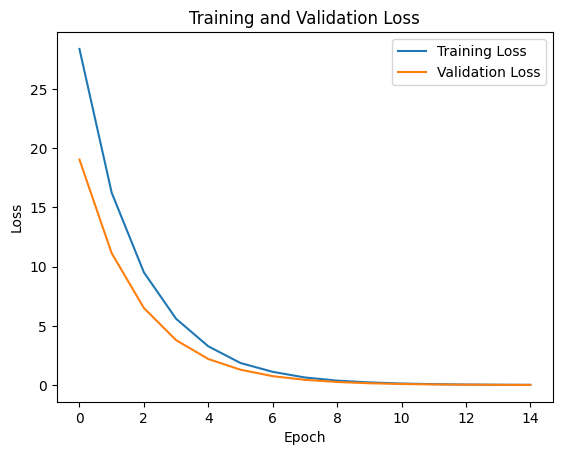

In [10]:
in_features = X_train.shape[1]
num_epochs = 15
learning_rate = 0.01

model = LinearRegressionScratch(in_features=in_features)
optimizer = SGDScratch(model.parameters(), lr=learning_rate)
criterion = MSELossScratch()
trainer = TrainerScratch(model, train_dataloader, val_dataloader, optimizer, criterion)
trainer.fit(num_epochs=num_epochs)

## Regularized Linear Regression From Scratch

Regularization is a technique to reduce overfitting. In `RegularizedLinearRegressionModel`, we add a regularization term to the loss function:

$ \text{Total Loss} = \text{MSE Loss} + \frac{\lambda}{2} \sum_{i=1}^{d} w_i^2 $

- $\lambda$ is the regularization strength.
- The regularization term penalizes large weights, encouraging simpler models.

In [11]:
n, d = 20, 200
X = torch.randn(n, d)
noise = torch.randn(n, 1) * 0.01
w, b = torch.ones((d, 1)) * 0.01, 0.05

1
y = torch.matmul(X, w) + b + noise

In [12]:
X_train, y_train, X_val, y_val = train_test_split(X, y, train_size=0.2)
train_dataloader = DataLoaderScratch(X_train, y_train, batch_size=64, shuffle=True)
val_dataloader = DataLoaderScratch(X_val, y_val, batch_size=64, shuffle=False)

We compare the performance of the regularized model with different $\lambda$ values to illustrate the effect of regularization.

In [13]:
class MSELossL2Scratch(nn.Module):
    def __init__(self, model, lambda_l2=0.01):
        super(MSELossL2Scratch, self).__init__()
        self.model = model
        self.lambda_l2 = lambda_l2

    def forward(self, y_pred, y_true):
        mse_loss = torch.mean((y_pred - y_true) ** 2)
        reg_loss = self.lambda_l2 * model.w.norm() ** 2 / 2
        total_loss = mse_loss + reg_loss
        return total_loss

Epoch 1/15, Training Loss: 238.4844, Validation Loss: 173.2537
Epoch 2/15, Training Loss: 5.9678, Validation Loss: 172.3053
Epoch 3/15, Training Loss: 0.1726, Validation Loss: 172.1559
Epoch 4/15, Training Loss: 0.0053, Validation Loss: 172.1021
Epoch 5/15, Training Loss: 0.0002, Validation Loss: 172.0942
Epoch 6/15, Training Loss: 0.0000, Validation Loss: 172.0922
Epoch 7/15, Training Loss: 0.0000, Validation Loss: 172.0918
Epoch 8/15, Training Loss: 0.0000, Validation Loss: 172.0917
Epoch 9/15, Training Loss: 0.0000, Validation Loss: 172.0917
Epoch 10/15, Training Loss: 0.0000, Validation Loss: 172.0917
Epoch 11/15, Training Loss: 0.0000, Validation Loss: 172.0917
Epoch 12/15, Training Loss: 0.0000, Validation Loss: 172.0917
Epoch 13/15, Training Loss: 0.0000, Validation Loss: 172.0917
Epoch 14/15, Training Loss: 0.0000, Validation Loss: 172.0917
Epoch 15/15, Training Loss: 0.0000, Validation Loss: 172.0917


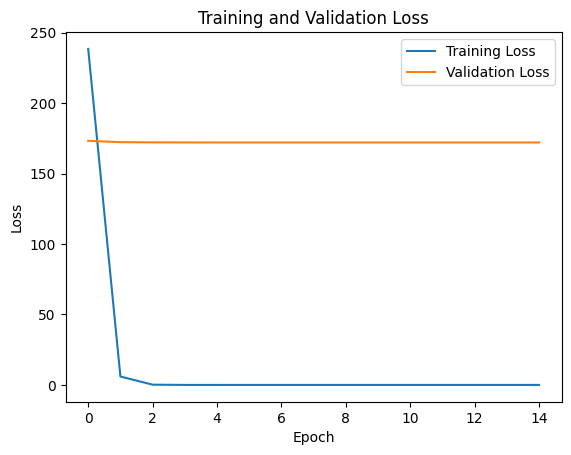

In [14]:
in_features = X_train.shape[1]
num_epochs = 15
learning_rate = 0.01
lambda_l2 = 0

model = LinearRegressionScratch(in_features=in_features)
optimizer = SGDScratch(model.parameters(), lr=learning_rate)
criterion = MSELossL2Scratch(model, lambda_l2=lambda_l2)
trainer = TrainerScratch(model, train_dataloader, val_dataloader, optimizer, criterion)
trainer.fit(num_epochs=num_epochs)

Epoch 1/15, Training Loss: 616.2888, Validation Loss: 676.2205
Epoch 2/15, Training Loss: 397.4786, Validation Loss: 611.0131
Epoch 3/15, Training Loss: 355.3867, Validation Loss: 551.5823
Epoch 4/15, Training Loss: 320.6279, Validation Loss: 497.8235
Epoch 5/15, Training Loss: 289.3628, Validation Loss: 449.2882
Epoch 6/15, Training Loss: 261.1499, Validation Loss: 405.4832
Epoch 7/15, Training Loss: 235.6878, Validation Loss: 365.9492
Epoch 8/15, Training Loss: 212.7084, Validation Loss: 330.2701
Epoch 9/15, Training Loss: 191.9694, Validation Loss: 298.0700
Epoch 10/15, Training Loss: 173.2525, Validation Loss: 269.0097
Epoch 11/15, Training Loss: 156.3605, Validation Loss: 242.7831
Epoch 12/15, Training Loss: 141.1155, Validation Loss: 219.1138
Epoch 13/15, Training Loss: 127.3568, Validation Loss: 197.7526
Epoch 14/15, Training Loss: 114.9396, Validation Loss: 178.4744
Epoch 15/15, Training Loss: 103.7331, Validation Loss: 161.0760


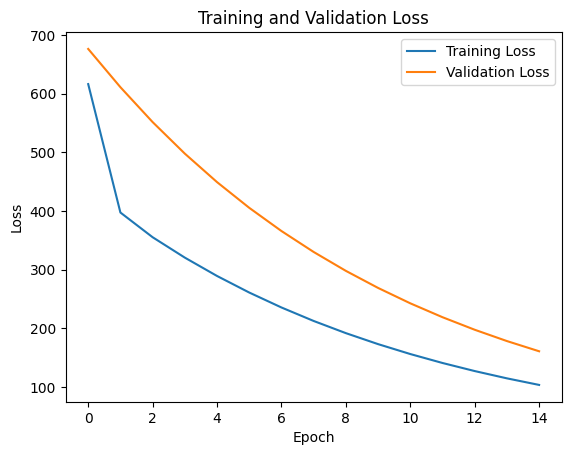

In [15]:
in_features = X_train.shape[1]
num_epochs = 15
learning_rate = 0.01
lambda_l2 = 5

model = LinearRegressionScratch(in_features=in_features)
optimizer = SGDScratch(model.parameters(), lr=learning_rate)
criterion = MSELossL2Scratch(model, lambda_l2=lambda_l2)
trainer = TrainerScratch(model, train_dataloader, val_dataloader, optimizer, criterion)
trainer.fit(num_epochs=num_epochs)

## Concise Implementation of Linear Regression with SGD

For a more concise implementation, we leverage PyTorch's built-in modules:

- **`nn.Linear`**: Defines a linear layer with weights and biases.
- **`optim.SGD`**: Stochastic Gradient Descent optimizer.
- **`nn.MSELoss`**: Mean Squared Error loss function.

These functions abstract away much of the manual work, allowing for a more streamlined and error-free implementation.

In [16]:
n = 1000
w = torch.tensor([2, -3.4]).reshape((-1, 1))
b = 4

X = torch.randn(n, len(w))
noise = torch.normal(mean=0, std=0.01, size=(n, 1))
y = X @ w + b + noise

Epoch 1/10, Training Loss: 26.8051, Validation Loss: 22.6707
Epoch 2/10, Training Loss: 15.3837, Validation Loss: 13.3035
Epoch 3/10, Training Loss: 9.2109, Validation Loss: 7.7377
Epoch 4/10, Training Loss: 5.3477, Validation Loss: 4.5179
Epoch 5/10, Training Loss: 3.1353, Validation Loss: 2.6378
Epoch 6/10, Training Loss: 1.8232, Validation Loss: 1.5553
Epoch 7/10, Training Loss: 1.0900, Validation Loss: 0.9123
Epoch 8/10, Training Loss: 0.6419, Validation Loss: 0.5348
Epoch 9/10, Training Loss: 0.3731, Validation Loss: 0.3180
Epoch 10/10, Training Loss: 0.2234, Validation Loss: 0.1887


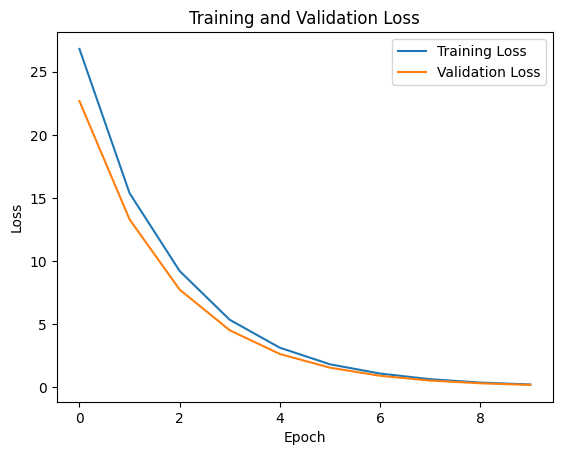

In [17]:
# Assuming X and y are your feature and target tensors
# Split Data into Train and Test Sets
dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Define DataLoader
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Define the Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)


model = LinearRegression(X.shape[1])

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
trainer = TrainerScratch(model, train_dataloader, val_dataloader, optimizer, criterion)
trainer.fit(num_epochs=10)

In [18]:
model.linear.weight

Parameter containing:
tensor([[ 1.8658, -3.0850]], requires_grad=True)